In [2]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('https://cdn.buenosaires.gob.ar/datosabiertos/datasets/ministerio-de-economia-y-finanzas/buenos-aires-compras/bac_anual.csv', low_memory=False) # col 23, 24, 25, 109, 110, 111, 112 vacias
# df.head()  

In [4]:
i = 0
for col in df.columns:
    print(str(i) + ' - ' + col)
    i+=1

0 - ocid
1 - id
2 - date
3 - initiationType
4 - tag
5 - tender/id
6 - tender/title
7 - tender/description
8 - tender/status
9 - tender/procuringEntity/id
10 - tender/value/currency
11 - tender/value/amount
12 - tender/procuringEntity/name
13 - tender/procurementMethod
14 - tender/procurementMethodDetails
15 - tender/mainProcurementCategory
16 - tender/additionalProcurementCategories
17 - tender/tenderPeriod/startDate
18 - tender/tenderPeriod/endDate
19 - tender/tenderPeriod/durationInDays
20 - tender/enquiryPeriod/startDate
21 - tender/enquiryPeriod/endDate
22 - tender/enquiryPeriod/durationInDays
23 - tender/techniques/frameworkAgreement/method
24 - tender/techniques/frameworkAgreement/period/startDate
25 - tender/techniques/frameworkAgreement/period/endDate
26 - tender/techniques/frameworkAgreement/period/durationInDays
27 - tender/techniques/frameworkAgreement/value/amount
28 - tender/techniques/frameworkAgreement/value/currency
29 - tender/techniques/hasFrameworkAgreement
30 - tend

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65378 entries, 0 to 65377
Columns: 113 entries, ocid to relatedProcesses/identifier
dtypes: bool(2), float64(15), int64(2), object(94)
memory usage: 55.5+ MB


In [6]:
df.describe()

tender/value/amount  tender/tenderPeriod/durationInDays  \
count         6.537800e+04                        65378.000000   
mean          2.965012e+07                           14.759460   
std           8.755798e+08                           15.832328   
min           0.000000e+00                            0.000000   
25%           0.000000e+00                            5.000000   
50%           3.105275e+04                            8.000000   
75%           2.255962e+05                           17.000000   
max           3.561339e+10                          119.000000   

       tender/enquiryPeriod/durationInDays  \
count                         65378.000000   
mean                             12.646058   
std                              14.203103   
min                               0.000000   
25%                               4.000000   
50%                               7.000000   
75%                              14.000000   
max                             116.000000   

       tender/techniques/frameworkAgreement/period/durationInDays  \
count                                          79.000000            
mean                                          197.075949            
std                                           416.270523            
min                                             0.000000            
25%                                             0.000000            
50%                                            20.000000            
75%                                            71.000000            
max                                          1461.000000            

       tender/techniques/frameworkAgreement/value/amount  \
count                                       1.184700e+04   
mean                                        5.680365e+05   
std                                         2.351397e+06   
min                                         1.353600e+02   
25%                                         3.041480e+04   
50%                                         1.749990e+05   
75%                                         3.823705e+05   
max                                         4.399631e+07   

       tender/items/0/quantity  tender/items/0/unit/value/amount  \
count             6.537800e+04                      6.537800e+04   
mean              2.434222e+05                      2.324130e+05   
std               5.536786e+06                      3.537370e+06   
min               1.000000e-01                      0.000000e+00   
25%               5.000000e+00                      0.000000e+00   
50%               4.000000e+01                      5.810000e+02   
75%               2.000000e+02                      1.484952e+04   
max               1.851043e+08                      1.740000e+08   

       awards/0/value/amount  awards/0/contractPeriod/durationInDays  \
count           5.130200e+04                            39305.000000   
mean            2.431158e+06                              237.386236   
std             7.894098e+07                              287.645071   
min             1.000000e-02                                1.000000   
25%             3.392450e+04                               90.000000   
50%             1.659600e+05                              184.000000   
75%             6.986000e+05                              365.000000   
max             1.233016e+10                            11110.000000   

       awards/0/items/0/quantity  awards/0/items/0/unit/value/amount  \
count               5.130200e+04                        5.130200e+04   
mean                1.947926e+04                        2.278666e+05   
std                 4.966813e+05                        2.926096e+06   
min                 7.000000e-02                        1.000000e-02   
25%                 2.000000e+00                        8.100025e+02   
50%                 1.000000e+01                        6.971415e+03   
75%                 1.000000e+02                        7.346080e+04

In [7]:
df.isnull().sum()

ocid                                 0
id                                   0
date                                 0
initiationType                       0
tag                                  0
                                 ...  
relatedProcesses/id              50674
relatedProcesses/relationship    50674
relatedProcesses/title           50674
relatedProcesses/scheme          50674
relatedProcesses/identifier      53531
Length: 113, dtype: int64

In [8]:
# recuento de los valores faltantes y calculo del porcentaje de los mismos

valores_faltantes = df.isnull().sum()
valores_totales = df.isnull().count()
porcentaje_faltantes = round(valores_faltantes/valores_totales*100,2)
faltantes_df = pd.DataFrame({'cuenta': valores_faltantes, 'porcentaje': porcentaje_faltantes})
print(faltantes_df)

                               cuenta  porcentaje
ocid                                0        0.00
id                                  0        0.00
date                                0        0.00
initiationType                      0        0.00
tag                                 0        0.00
...                               ...         ...
relatedProcesses/id             50674       77.51
relatedProcesses/relationship   50674       77.51
relatedProcesses/title          50674       77.51
relatedProcesses/scheme         50674       77.51
relatedProcesses/identifier     53531       81.88

[113 rows x 2 columns]


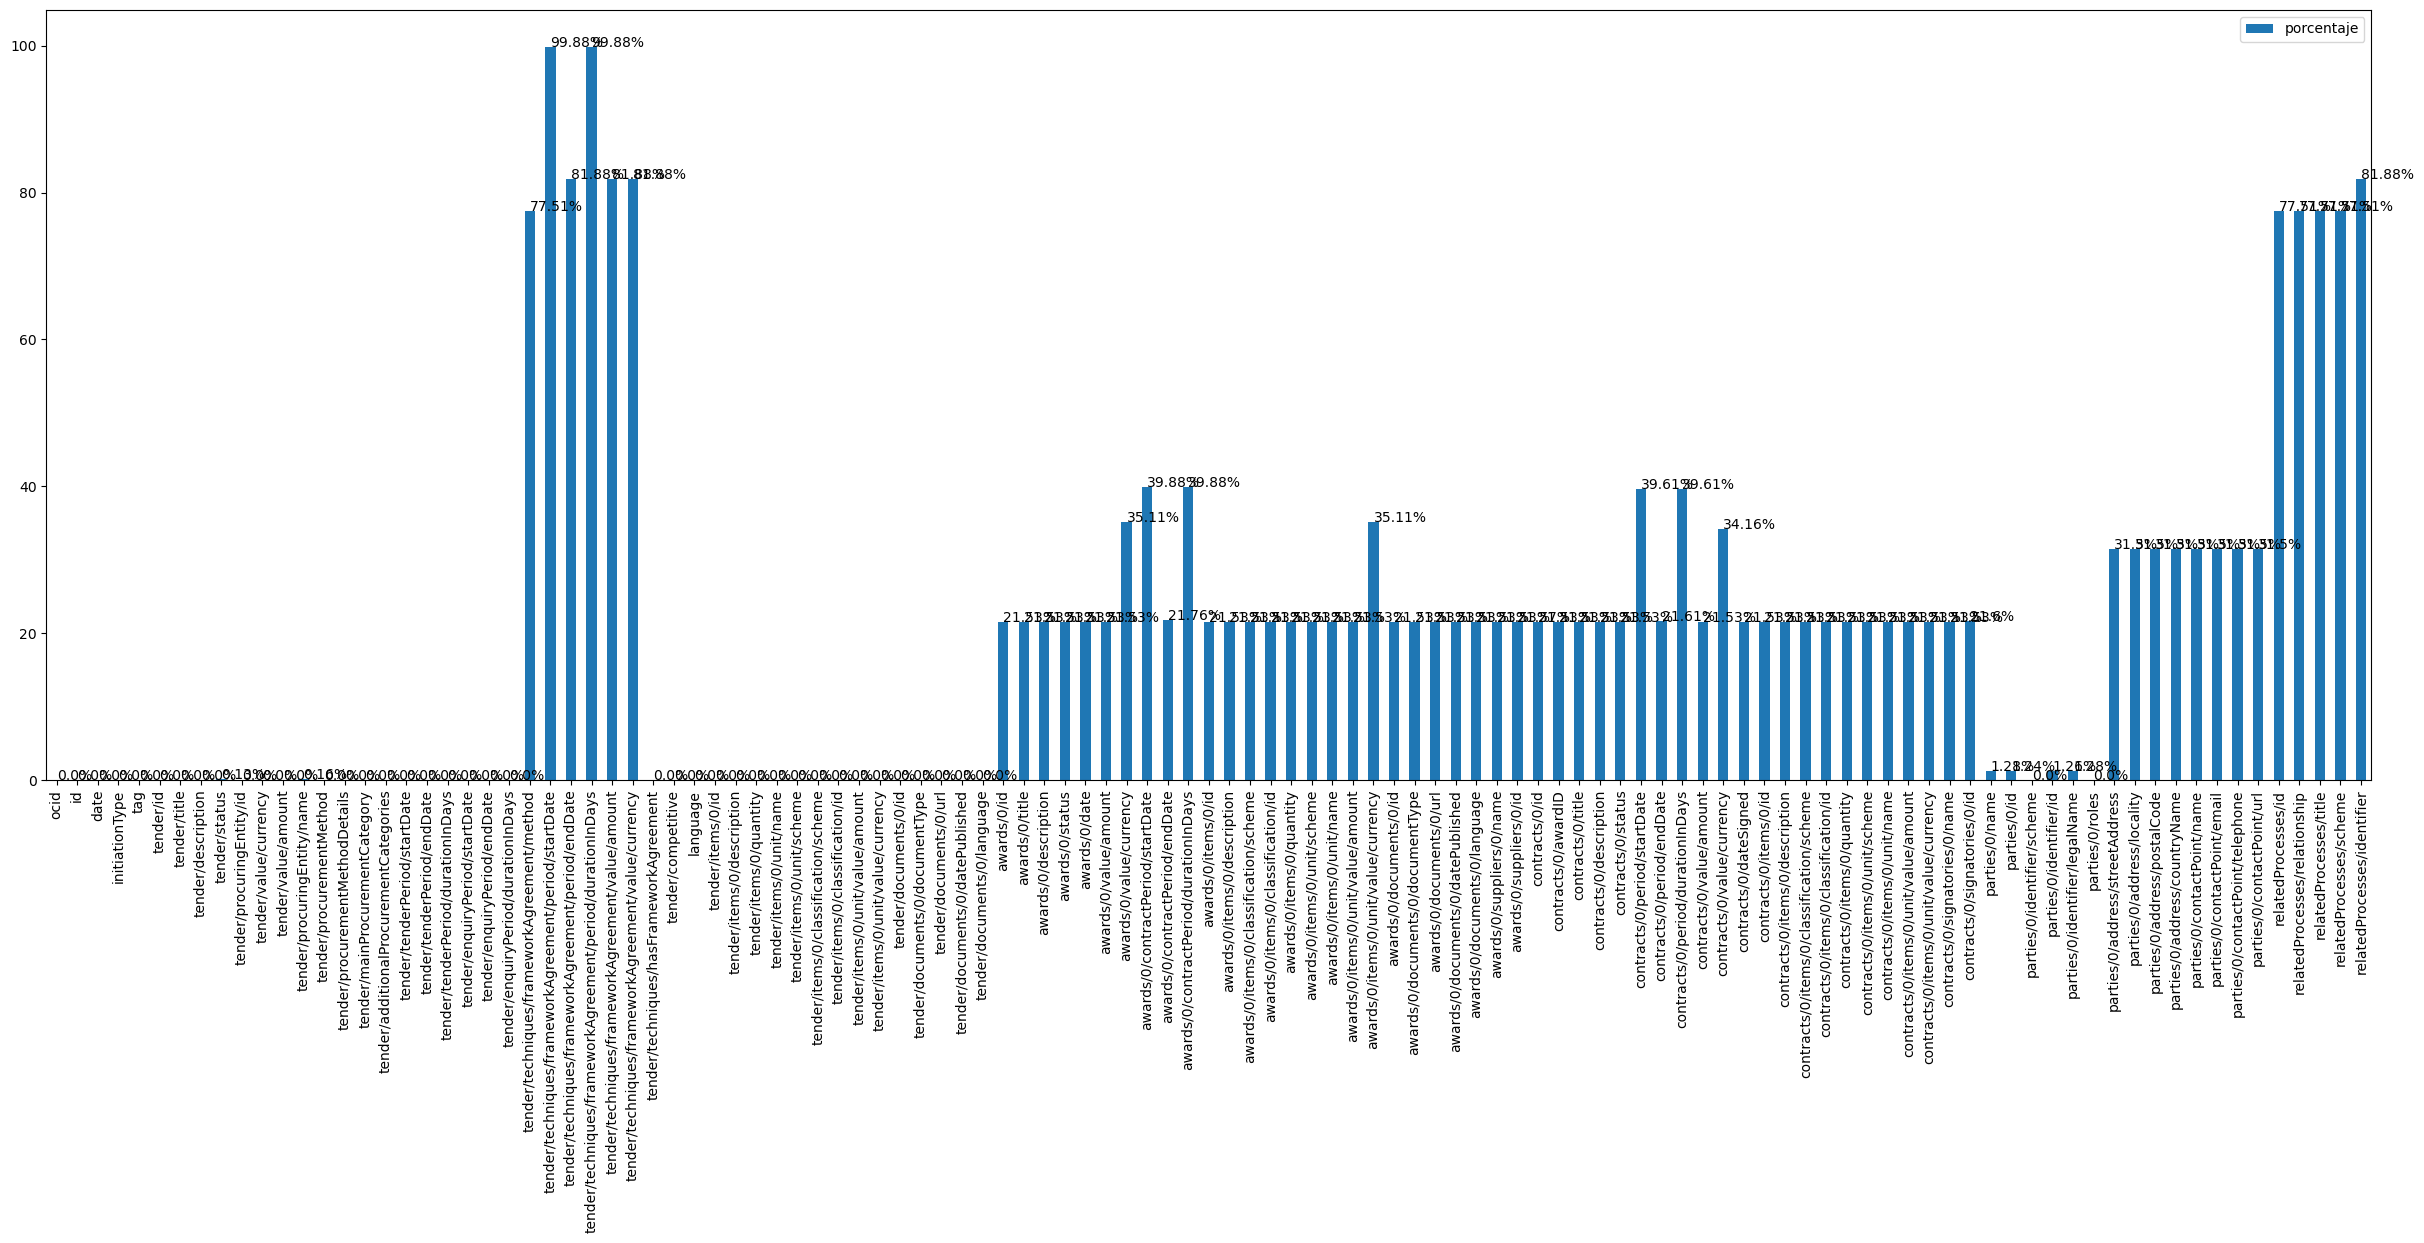

In [9]:
# Grafico los resultados

barchart = faltantes_df.plot.bar(y='porcentaje', figsize = (30, 10))

for index, porcentaje in enumerate(porcentaje_faltantes):
    barchart.text(index, porcentaje, str(porcentaje)+'%')

In [10]:
faltantes_df.query('porcentaje>70')

cuenta  porcentaje
tender/techniques/frameworkAgreement/method          50674       77.51
tender/techniques/frameworkAgreement/period/sta...   65299       99.88
tender/techniques/frameworkAgreement/period/end...   53531       81.88
tender/techniques/frameworkAgreement/period/dur...   65299       99.88
tender/techniques/frameworkAgreement/value/amount    53531       81.88
tender/techniques/frameworkAgreement/value/curr...   53531       81.88
relatedProcesses/id                                  50674       77.51
relatedProcesses/relationship                        50674       77.51
relatedProcesses/title                               50674       77.51
relatedProcesses/scheme                              50674       77.51
relatedProcesses/identifier                          53531       81.88

In [11]:
# elimino las filas duplicadas

# dropeo las primeras dos columnas de identificacion, parecen no tener info solo es un index
df = df.drop(['ocid', 'id'], axis=1, index=None)


In [12]:
# elimino todos los duplica
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63300 entries, 0 to 65377
Columns: 111 entries, date to relatedProcesses/identifier
dtypes: bool(2), float64(15), int64(2), object(92)
memory usage: 53.2+ MB


In [13]:
# Veo el tipo de dato por columna

i = 0
for col in df.columns:
    print(str(i) + ' - ' + col + ' - ' + str(df[col].dtype))
    i+=1

0 - date - object
1 - initiationType - object
2 - tag - object
3 - tender/id - object
4 - tender/title - object
5 - tender/description - object
6 - tender/status - object
7 - tender/procuringEntity/id - object
8 - tender/value/currency - object
9 - tender/value/amount - float64
10 - tender/procuringEntity/name - object
11 - tender/procurementMethod - object
12 - tender/procurementMethodDetails - object
13 - tender/mainProcurementCategory - object
14 - tender/additionalProcurementCategories - object
15 - tender/tenderPeriod/startDate - object
16 - tender/tenderPeriod/endDate - object
17 - tender/tenderPeriod/durationInDays - int64
18 - tender/enquiryPeriod/startDate - object
19 - tender/enquiryPeriod/endDate - object
20 - tender/enquiryPeriod/durationInDays - int64
21 - tender/techniques/frameworkAgreement/method - object
22 - tender/techniques/frameworkAgreement/period/startDate - object
23 - tender/techniques/frameworkAgreement/period/endDate - object
24 - tender/techniques/frameworkA

In [14]:
# Formato de fechas AAAA/MM/DD

columnas_fechas = ['date', 'tender/tenderPeriod/startDate', 'tender/tenderPeriod/endDate', 'tender/enquiryPeriod/startDate', 'tender/enquiryPeriod/endDate', 
                   'tender/documents/0/datePublished', 'tender/techniques/frameworkAgreement/period/startDate','tender/techniques/frameworkAgreement/period/endDate',
                   'awards/0/date', 'awards/0/documents/0/datePublished','awards/0/contractPeriod/startDate','awards/0/contractPeriod/endDate', 
                   'awards/0/documents/0/datePublished', 'contracts/0/period/startDate', 'contracts/0/period/endDate', 'contracts/0/dateSigned']

for i in columnas_fechas:
    df[i] = pd.to_datetime(df[i], format="%Y/%m/%d")
    df[i] = df[i].dt.strftime('%Y/%m/%d')
    print(i)


date
tender/tenderPeriod/startDate
tender/tenderPeriod/endDate
tender/enquiryPeriod/startDate
tender/enquiryPeriod/endDate
tender/documents/0/datePublished
tender/techniques/frameworkAgreement/period/startDate
tender/techniques/frameworkAgreement/period/endDate
awards/0/date
awards/0/documents/0/datePublished
awards/0/contractPeriod/startDate
awards/0/contractPeriod/endDate
awards/0/documents/0/datePublished
contracts/0/period/startDate
contracts/0/period/endDate
contracts/0/dateSigned


In [15]:
# divido las columnas segun categorica o numericas

from pandas.core.dtypes.api import is_numeric_dtype, is_string_dtype

num_list = []
cat_list = []

for col in df:
    if is_numeric_dtype(df[col]):
        num_list.append(col)
    elif is_string_dtype(df[col]):
        cat_list.append(col)

# print("Variables numericas: ",num_list)
# print("Variables categoricas: ",cat_list)

In [16]:
# Veo el contenido de cada columna para determinar si tiene datos de interes o puede ser despreciada
i = 0
col_valorunico = []
for col in cat_list:
    Desc = df[col].describe()
    if Desc['unique'] == 1:
        print('columna: ' + str(i) + ' - ' + str(col))
        print(Desc['unique'])
        print(Desc['top'])
        print('')
        print('')
        col_valorunico.append(col)
    i += 1 

columna: 1 - initiationType
1
tender


columna: 18 - tender/techniques/frameworkAgreement/method
1
withAndWithoutReopeningCompetition


columna: 21 - tender/techniques/frameworkAgreement/value/currency
1
ARS


columna: 22 - language
1
es


columna: 26 - tender/items/0/unit/scheme
1
x_unidades_medida_bac


columna: 27 - tender/items/0/classification/scheme
1
x_catalogo_bienes_servicios_bac


columna: 31 - tender/documents/0/documentType
1
tenderNotice


columna: 34 - tender/documents/0/language
1
es


columna: 38 - awards/0/status
1
active


columna: 45 - awards/0/items/0/classification/scheme
1
x_catalogo_bienes_servicios_BAC


columna: 47 - awards/0/items/0/unit/scheme
1
x_unidades_medida_bac


columna: 51 - awards/0/documents/0/documentType
1
awardNotice


columna: 54 - awards/0/documents/0/language
1
es


columna: 68 - contracts/0/items/0/classification/scheme
1
x_catalogo_bienes_servicios_BAC


columna: 70 - contracts/0/items/0/unit/scheme
1
x_unidades_medida_bac


columna: 81 - pa

In [17]:
# dropeo todas los columnas con valores unicos salvo la 21, que contiene una divisa (ARG) y no todas las divisas son iguales en el resto de las columnas
col_valorunico.remove('tender/techniques/frameworkAgreement/value/currency')

In [18]:
df = df.drop(col_valorunico, axis=1)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63300 entries, 0 to 65377
Data columns (total 88 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   date                                                        63300 non-null  object 
 1   tag                                                         63300 non-null  object 
 2   tender/id                                                   63300 non-null  object 
 3   tender/title                                                63300 non-null  object 
 4   tender/description                                          63300 non-null  object 
 5   tender/status                                               63218 non-null  object 
 6   tender/procuringEntity/id                                   63300 non-null  object 
 7   tender/value/currency                                       63300 non-null  object 
 

<AxesSubplot:xlabel='tender/items/0/unit/name', ylabel='Count'>

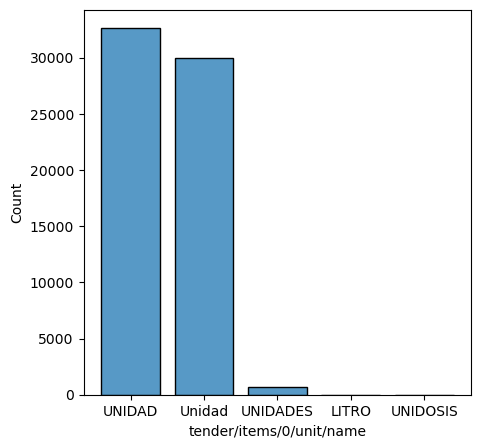

In [20]:
# grafico columnas especificas para normalizar

import seaborn as sns 
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (5, 5))
sns.histplot(data=df, x="tender/items/0/unit/name", kde=False, shrink=.8, discrete=True)

In [21]:
df['tender/items/0/unit/name'] = df['tender/items/0/unit/name'].str.replace('UNIDAD', 'Unidad')
df['tender/items/0/unit/name'] = df['tender/items/0/unit/name'].str.replace('UNIDADES', 'Unidad')
df['tender/items/0/unit/name'] = df['tender/items/0/unit/name'].str.replace('UnidadES', 'Unidad')

<AxesSubplot:xlabel='tender/items/0/unit/name', ylabel='Count'>

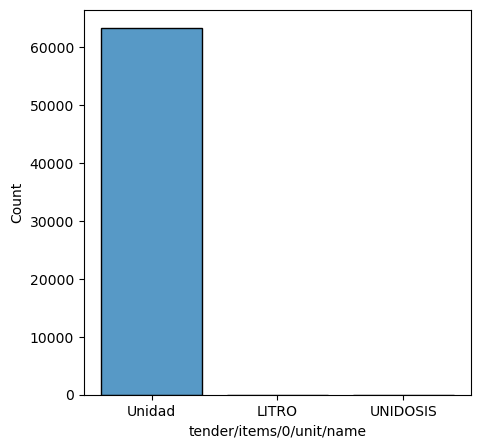

In [22]:
fig, ax = plt.subplots(figsize = (5, 5))
sns.histplot(data=df, x="tender/items/0/unit/name", kde=False, shrink=.8, discrete=True)

In [23]:
# Cuento el numero de ocurrencias de litro y unidosis

ocurrencia = df.pivot_table(index = ['tender/items/0/unit/name'], aggfunc ='size')
print(ocurrencia)

tender/items/0/unit/name
LITRO           4
UNIDOSIS        5
Unidad      63291
dtype: int64


In [24]:
# veo el contenido de estas lineas

a = df['tender/items/0/unit/name']
index = [i for i, e in enumerate(a) if e == 'LITRO']
print(index)

for i in index:
    print(df.iloc[i])

[16921, 16922, 47369, 47370]
date                                                  2022/05/31
tag                                        tender;award;contract
tender/id                                         419-1481-CME22
tender/title                        ADQUISICIÓN AGUA EMBOTELLADA
tender/description                      Alimentos para personas-
                                                ...             
parties/0/roles                                         supplier
parties/0/contactPoint/telephone                             NaN
relatedProcesses/id                                          NaN
relatedProcesses/title                                       NaN
relatedProcesses/identifier                                  NaN
Name: 17984, Length: 88, dtype: object
date                                                  2022/05/31
tag                                        tender;award;contract
tender/id                                         419-1481-CME22
tender/title          

In [25]:
# Para visualizar, se deje eliminar antes de commitear

df.to_csv('bac_anuel_clean.csv')


In [26]:
# resultado

df.info()

# resultando un df con: 
# 63300 lineas, 2077 menos 
# 88 columnas, 25 menos                 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63300 entries, 0 to 65377
Data columns (total 88 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   date                                                        63300 non-null  object 
 1   tag                                                         63300 non-null  object 
 2   tender/id                                                   63300 non-null  object 
 3   tender/title                                                63300 non-null  object 
 4   tender/description                                          63300 non-null  object 
 5   tender/status                                               63218 non-null  object 
 6   tender/procuringEntity/id                                   63300 non-null  object 
 7   tender/value/currency                                       63300 non-null  object 
 

In [25]:
# Conviertro a excel 

df.to_excel("bac_anuel_clean.xlsx") 

In [ ]:
# ANLISIS

<AxesSubplot:xlabel='tender/status', ylabel='Count'>

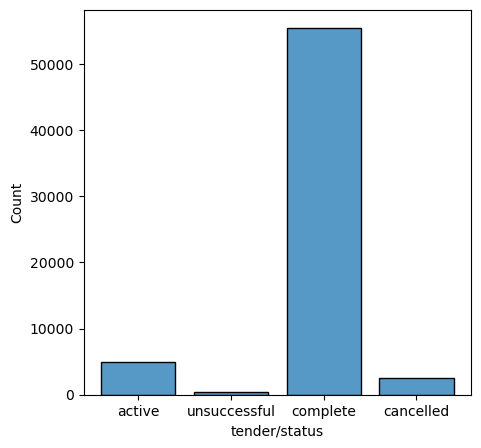

In [27]:
# status

fig, ax = plt.subplots(figsize = (5, 5))
sns.histplot(data=df, x="tender/status", kde=False, shrink=.8, discrete=True)

In [28]:
# Existe 4 categorias, la mas importante es "complete", ya que reprensenta los montos efectivos

ocurrencia = df.pivot_table(index = ['tender/status'], aggfunc ='size')
print(ocurrencia)

tender/status
active           4961
cancelled        2467
complete        55388
unsuccessful      402
dtype: int64


In [36]:
# Trabajaremos con las licitaciones completas y las activas

complete = df['tender/status'] == 'complete'
complete_df = df[complete]
complete_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55388 entries, 23 to 65377
Data columns (total 88 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   date                                                        55388 non-null  object 
 1   tag                                                         55388 non-null  object 
 2   tender/id                                                   55388 non-null  object 
 3   tender/title                                                55388 non-null  object 
 4   tender/description                                          55388 non-null  object 
 5   tender/status                                               55388 non-null  object 
 6   tender/procuringEntity/id                                   55388 non-null  object 
 7   tender/value/currency                                       55388 non-null  object 


In [37]:
active = df['tender/status'] == 'active'
active_df = df[active]
active_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4961 entries, 0 to 65308
Data columns (total 88 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   date                                                        4961 non-null   object 
 1   tag                                                         4961 non-null   object 
 2   tender/id                                                   4961 non-null   object 
 3   tender/title                                                4961 non-null   object 
 4   tender/description                                          4961 non-null   object 
 5   tender/status                                               4961 non-null   object 
 6   tender/procuringEntity/id                                   4961 non-null   object 
 7   tender/value/currency                                       4961 non-null   object 
 8

In [39]:
complete_df.to_csv('complete.csv')
active_df.to_csv('active.csv')

In [46]:
# Dentro de las licitacion con status complete, nos interesan las filas de supliers, empresas que ganaron cada una 

complete_suplier = complete_df['parties/0/roles'] == 'supplier'
complete_suplier_df = complete_df[complete_suplier]
complete_suplier_df.info()
complete_suplier_df.to_csv('complete_suplier.csv')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20281 entries, 29 to 65377
Data columns (total 88 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   date                                                        20281 non-null  object 
 1   tag                                                         20281 non-null  object 
 2   tender/id                                                   20281 non-null  object 
 3   tender/title                                                20281 non-null  object 
 4   tender/description                                          20281 non-null  object 
 5   tender/status                                               20281 non-null  object 
 6   tender/procuringEntity/id                                   20281 non-null  object 
 7   tender/value/currency                                       20281 non-null  object 


In [48]:
# Analizo las divisas

ocurrencia = complete_suplier_df.pivot_table(index = ['tender/value/currency'], aggfunc ='size')
print(ocurrencia)

tender/value/currency
ARS    20157
EUR        2
USD      122
dtype: int64


In [59]:
# monto total en cada divisa

def totalmonto(divisa):
    aux = complete_suplier_df['tender/value/currency'] == divisa
    complete_suplier_ARG_df = complete_suplier_df[aux]
    print(complete_suplier_ARG_df['tender/value/amount'].sum())
    
    return 

print("Monto total en PESOS: ")
totalmonto('ARS')
print("\nMonto total en USD: ")
totalmonto('USD')
print("\nMonto total en EUR: ")
totalmonto('EUR')
# ARS = complete_suplier_df['tender/value/currency'] == 'ARS'
# complete_suplier_ARG_df = complete_suplier_df[ARS]
# complete_suplier_ARG_df['tender/value/amount'].sum()
# complete_suplier_df.info()
# complete_suplier_df.to_csv('complete_suplier.csv')

Monto total en PESOS: 
933614053858.1204

Monto total en USD: 
1301660265.97

Monto total en EUR: 
10649319.3
